In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import pandas as pd
import scienceplots
from matplotlib.lines import Line2D


plt.style.use(['science', 'no-latex'])  
plt.rcParams['font.sans-serif'] = "cmr12"
plt.rcParams['mathtext.fontset'] = "cm" 
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 18
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'

In [2]:
# Load R05, D05, and ST09 spectral parameter datasets (BMC, diskbb, comptb models) for comparison
df_R05 = pd.read_excel('spectral parameter J1655 R05.xlsx', sheet_name='bmc')
df_R05d = pd.read_excel('spectral parameter J1655 R05.xlsx', sheet_name='diskbb2')
df_D05 = pd.read_excel('spectral parameter GROJ1655 D05.xlsx', sheet_name='bmc')
df_D05c = pd.read_excel('spectral parameter GROJ1655 D05.xlsx', sheet_name='comptb')
df_D05d = pd.read_excel('spectral parameter GROJ1655 D05.xlsx', sheet_name='diskbb')
df_ST09_R05 = pd.read_excel('spectral parameter J1655 ST09.xlsx', sheet_name='R05')
df_ST09_D05 = pd.read_excel('spectral parameter J1655 ST09.xlsx', sheet_name='D05')

In [3]:
# Define the scaling function and the conversion function from alpha to gamma
def scaling(Nbmc, A, B, Ntr, beta):
    f = A - B * np.log(np.exp(1 - (Nbmc/Ntr)**beta) + 1)
    return f

def alpha_gamma(alpha):
    return [a + 1 for a in alpha]


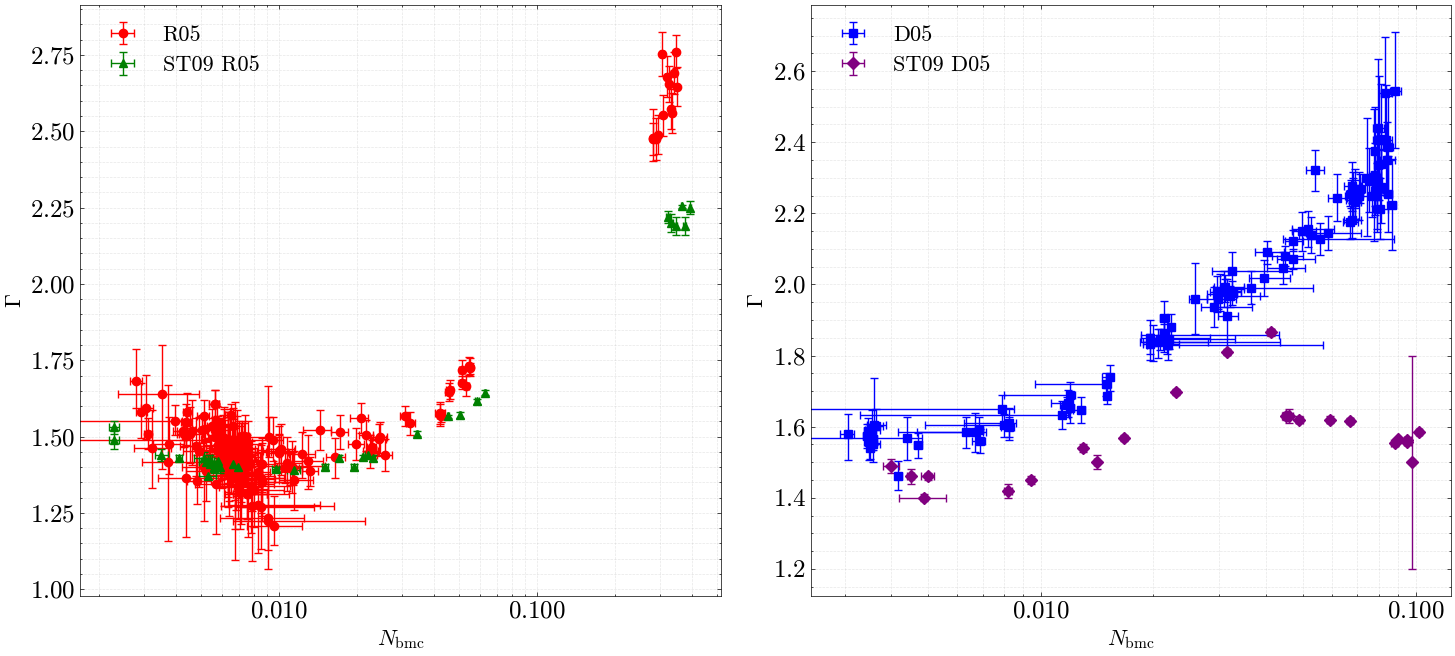

In [4]:
# Flexible function for plotting data with optional error bars
def plot_dataset(df, color, marker, label, ax):
    # Ensure the required columns exist
    required_cols = ['norm_bmc', 'alpha']
    error_cols = ['err_norm_bmc_p', 'err_norm_bmc_m', 'err_alpha_p', 'err_alpha_m']

    # If missing required columns → print warning
    if not all(col in df.columns for col in required_cols):
        print(f"Dataset {label} does not contain the required columns. Available columns: {df.columns}")
        return

    # Convert all numeric-like columns to numeric (avoid string parsing issues)
    for col in required_cols + [col for col in error_cols if col in df.columns]:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Extract data
    bmc = df['norm_bmc']             # x-axis
    alpha = df['alpha']              # spectral parameter alpha
    gamma = alpha_gamma(alpha)       # convert alpha → gamma (γ = α + 1)

    # Initialize error bars
    xerr, yerr = None, None

    # If normalization errors exist → build xerr
    if all(col in df.columns for col in ['err_norm_bmc_p', 'err_norm_bmc_m']):
        err_bmc_p = df['err_norm_bmc_p']
        err_bmc_m = df['err_norm_bmc_m']
        xerr = [np.abs(err_bmc_m), err_bmc_p]  # negative and positive errors

    # If alpha errors exist → propagate to gamma errors
    if all(col in df.columns for col in ['err_alpha_p', 'err_alpha_m']):
        err_alpha_p = df['err_alpha_p']
        err_alpha_m = df['err_alpha_m']
        err_gamma_p = err_alpha_p  # gamma errors are identical to alpha errors
        err_gamma_m = err_alpha_m
        yerr = [np.abs(err_gamma_m), err_gamma_p]

    # Plot data with error bars
    ax.errorbar(bmc, gamma, 
                xerr=xerr, yerr=yerr, 
                fmt=marker, color=color, capsize=3, label=label)


# -----------------------------
# Create figure with 2 panels (R05 and D05)
# -----------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Panel 1: R05 data
plot_dataset(df_R05, 'red', 'o', 'R05', ax1)
plot_dataset(df_ST09_R05, 'green', '^', 'ST09 R05', ax1)

# Panel 2: D05 data
plot_dataset(df_D05, 'blue', 's', 'D05', ax2)
plot_dataset(df_ST09_D05, 'purple', 'D', 'ST09 D05', ax2)

# -----------------------------
# Configure plot appearances
# -----------------------------
for ax, title in zip([ax1, ax2], ['R05 Data', 'D05 Data']):
    ax.set_xscale('log')  # log scale for x-axis
    ax.set_xlabel(r'$N_{\text{bmc}}$', fontsize=16, fontweight='bold')
    ax.set_ylabel(r'$\Gamma$', fontsize=16, fontweight='bold')
    ax.grid(True, which="both", ls="--", alpha=0.3)
    ax.legend(loc='best', fontsize=16)

    # Format x-axis numbers (disable scientific notation)
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    ax.xaxis.set_major_formatter(formatter)

plt.savefig('perbandingan parameter scaling GRO.png', dpi=300)
plt.tight_layout()
plt.show()


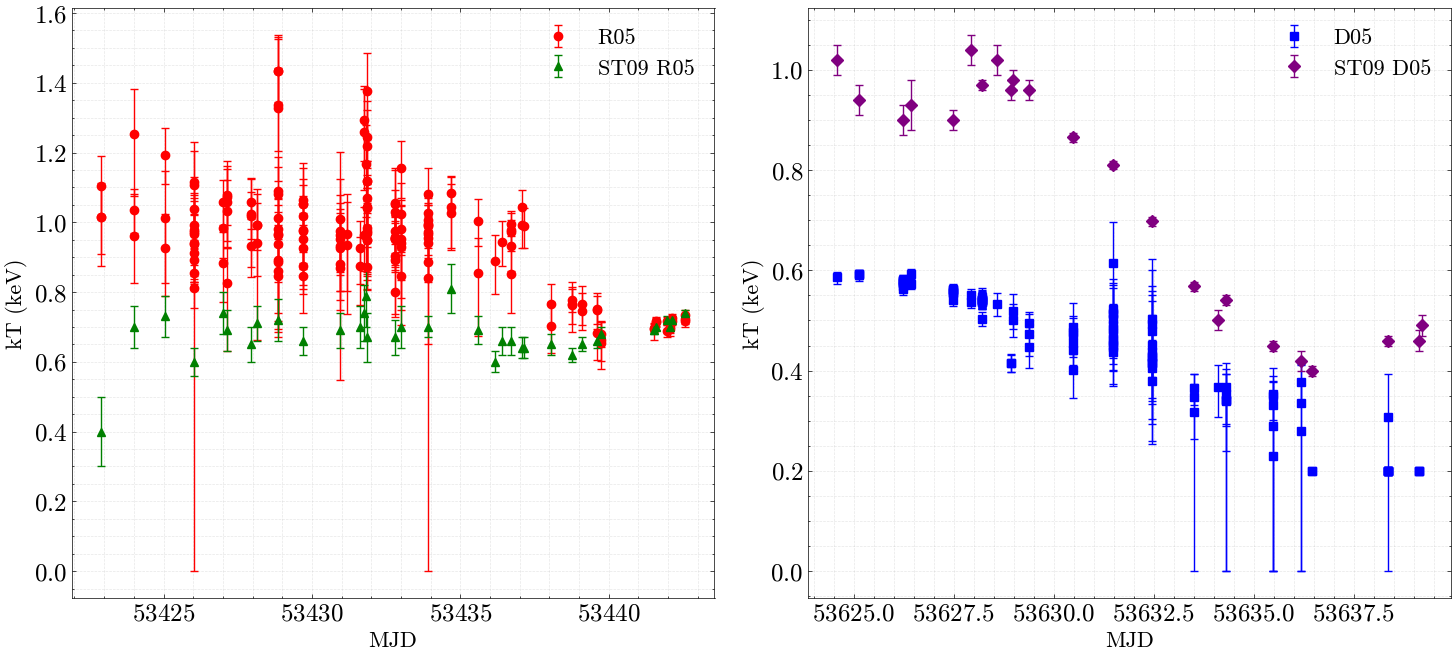

In [5]:
# Function for plotting data (MJD vs kT) with error bars
def plot_dataset(df, color, marker, label, ax):
    # Ensure required columns exist and convert to numeric
    required_cols = ['mjd', 'kT']
    error_cols = ['err_kT_p', 'err_kT_m']
    
    # Check if required columns are available
    if not all(col in df.columns for col in required_cols):
        print(f"Dataset {label} does not contain the required columns. Available columns: {df.columns}")
        return
    
    # Convert numeric columns (including errors) safely
    for col in required_cols + [col for col in error_cols if col in df.columns]:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Prepare main data
    mjd = df['mjd']
    kT = df['kT']
    
    # Prepare error bars (only yerr for kT)
    yerr = None
    if all(col in df.columns for col in ['err_kT_p', 'err_kT_m']):
        err_kT_p = df['err_kT_p']
        err_kT_m = df['err_kT_m']
        yerr = [np.abs(err_kT_m), err_kT_p]
    
    # Plot data with error bars
    ax.errorbar(mjd, kT, 
                xerr=None, 
                yerr=yerr, 
                fmt=marker, color=color, capsize=3, label=label)

# Create figure with 2 subplots (R05 and D05)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Plot R05 dataset
plot_dataset(df_R05, 'red', 'o', 'R05', ax1)
plot_dataset(df_ST09_R05, 'green', '^', 'ST09 R05', ax1)

# Plot D05 dataset
plot_dataset(df_D05, 'blue', 's', 'D05', ax2)
plot_dataset(df_ST09_D05, 'purple', 'D', 'ST09 D05', ax2)

# Configure subplot appearances
for ax, title in zip([ax1, ax2], ['R05 Data', 'D05 Data']):
    ax.set_xlabel('MJD', fontsize=16)
    ax.set_ylabel('kT (keV)', fontsize=16)
    ax.grid(True, which="both", ls="--", alpha=0.3)
    ax.legend(loc='best', fontsize=16)

# Save figure and show plot
plt.savefig('perbandingan parameter kT GRO.png', dpi=300)
plt.tight_layout()
plt.show()


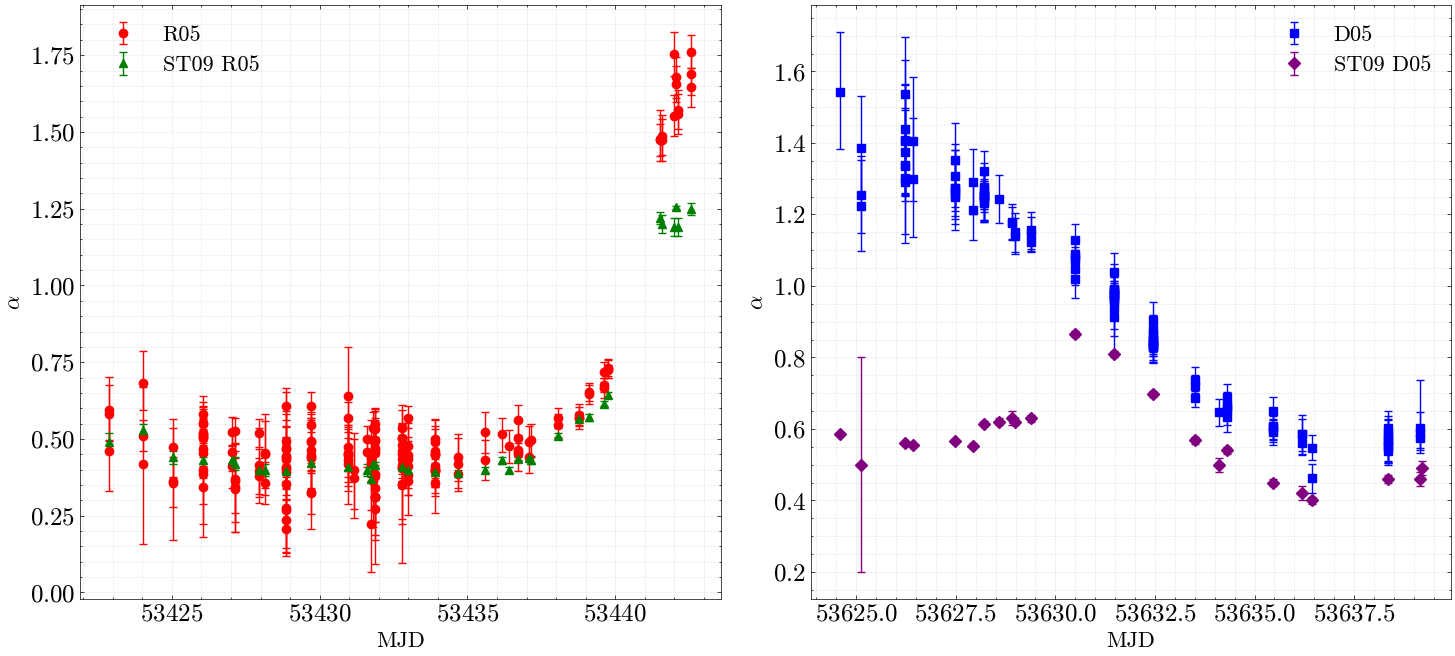

In [6]:
# Function for plotting data (MJD vs alpha) with error bars
def plot_dataset(df, color, marker, label, ax):
    # Ensure required columns exist and convert them to numeric
    required_cols = ['mjd', 'alpha']
    error_cols = ['err_alpha_p', 'err_alpha_m']
    
    # Check if required columns are available
    if not all(col in df.columns for col in required_cols):
        print(f"Dataset {label} does not contain the required columns. Available columns: {df.columns}")
        return
    
    # Convert numeric columns (including errors) safely
    for col in required_cols + [col for col in error_cols if col in df.columns]:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Prepare main data
    mjd = df['mjd']
    alpha = df['alpha']
    
    # Prepare error bars (yerr for alpha only)
    yerr = None
    if all(col in df.columns for col in ['err_alpha_p', 'err_alpha_m']):
        err_alpha_p = df['err_alpha_p']
        err_alpha_m = df['err_alpha_m']
        yerr = [np.abs(err_alpha_m), err_alpha_p]
    
    # Plot data with error bars
    ax.errorbar(mjd, alpha, 
                xerr=None, 
                yerr=yerr, 
                fmt=marker, color=color, capsize=3, label=label)

# Create figure with 2 subplots (R05 and D05)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Plot R05 dataset
plot_dataset(df_R05, 'red', 'o', 'R05', ax1)
plot_dataset(df_ST09_R05, 'green', '^', 'ST09 R05', ax1)

# Plot D05 dataset
plot_dataset(df_D05, 'blue', 's', 'D05', ax2)
plot_dataset(df_ST09_D05, 'purple', 'D', 'ST09 D05', ax2)

# Configure subplot appearances
for ax, title in zip([ax1, ax2], ['R05 Data', 'D05 Data']):
    ax.set_xlabel('MJD', fontsize=16)
    ax.set_ylabel(r'$\alpha$', fontsize=16)  # Use LaTeX formatting for alpha
    ax.grid(True, which="both", ls="--", alpha=0.3)
    ax.legend(loc='best', fontsize=16)
    
# Save and show plot
plt.savefig('perbandingan parameter alpha GRO.png', dpi=300)
plt.tight_layout()
plt.show()

In [7]:
from astropy.io import fits
from astropy.table import Table

# Open the FITS file
hdul = fits.open('GROJ1655-40.fits')

# Access the header of the second HDU (index 1, often the data table)
header = hdul[1].header

# Access the main (primary) header at HDU 0
header_main = hdul[0].header

# Print the reference MJD (Modified Julian Date) from the primary header
print(header_main['MJDREFI'])


49353


In [8]:
# Load the 1st extension (HDU 1) of the FITS file into an Astropy Table
data = Table.read('GROJ1655-40.fits', 1)

# Convert the Astropy Table to a pandas DataFrame for easier manipulation
data_df = data.to_pandas()

In [9]:
# Extract relevant columns from the FITS table
obsid = data['OBSID']
std1rate_data = data['STD1RATE']
P920RATE_data = data['P920RATE'] 
P49RATE_data = data['P49RATE'] 

# Add new columns to the DataFrame:
# 'x' = absolute time, combining TIME with reference MJD from the primary header
data_df['x'] = data['TIME'] + header_main['MJDREFI']  

# 'y_1' = STD1RATE values
data_df['y_1'] = data['STD1RATE'] 

# 'y_2' = hardness ratio (P920RATE / P49RATE)
data_df['y_2'] = data['P920RATE'] / data['P49RATE']

In [10]:
# Normalize 'OBSID' column: convert to string, strip whitespace, and lowercase
data_df['OBSID'] = data_df['OBSID'].astype(str).str.strip().str.lower()

# Define the list of OBSIDs from ST09 (converted to lowercase for matching)
obsid_st09 = [obsid.lower() for obsid in [
    # Rise phase
    "90058-16-02-00", "90058-16-03-00", "90058-16-04-00", "90058-16-05-00", "90058-16-06-00", "90058-16-07-00",
    "90428-01-01-00", "90428-01-01-01", "90428-01-01-02", "90428-01-01-03", "90428-01-01-04", "90428-01-01-05", 
    "90428-01-01-06", "90428-01-01-07", "90428-01-01-08", "90428-01-01-09", "91404-01-01-00", "91404-01-01-02",
    "91404-01-01-03", "91404-01-01-01", "91404-01-01-04", "91404-01-01-05", "91702-01-01-01",
    "91702-01-01-02", "91702-01-01-03", "91702-01-01-04", "91702-01-01-05", "90704-04-01-00", "90704-04-01-01",
    "91702-01-02-01", "91702-01-02-02", "91702-01-02-03", "91702-01-02-04", "91702-01-02-05", "91702-01-02-06",

    # Decay phase
    "91702-01-71-02", "91702-01-71-03", "91702-01-71-04", "91702-01-74-02", "91702-01-75-00", "91702-01-75-03", 
    "91702-01-76-00", "91702-01-76-01", "91702-01-76-02", "91702-01-76-03", "91702-01-79-00", "91702-01-79-01", 
    "91702-01-80-00", "91702-01-80-01", "91702-01-81-02", "91702-01-82-00", "91702-01-86-00", "91702-01-87-03"
]]

# Ensure numerical columns are in float32 format for consistency
data_df['y_1'] = data_df['y_1'].astype(np.float32)
data_df['y_2'] = data_df['y_2'].astype(np.float32)

# Create a boolean mask to identify rows where OBSID is in obsid_st09
mask_obsid_st09 = data_df['OBSID'].isin(obsid_st09)

# Split the DataFrame into two subsets
data_st09 = data_df[mask_obsid_st09]      # Data with OBSIDs from ST09
data_not_st09 = data_df[~mask_obsid_st09] # Data with OBSIDs not in ST09

# Debugging: print counts for verification
print("Number of entries in data_st09:", len(data_st09))
print("Number of entries in data_not_st09:", len(data_not_st09))

Number of entries in data_st09: 53
Number of entries in data_not_st09: 540


Number of entries in data_rise: 36
Number of entries in data_decay: 18
Number of entries in data_other: 539


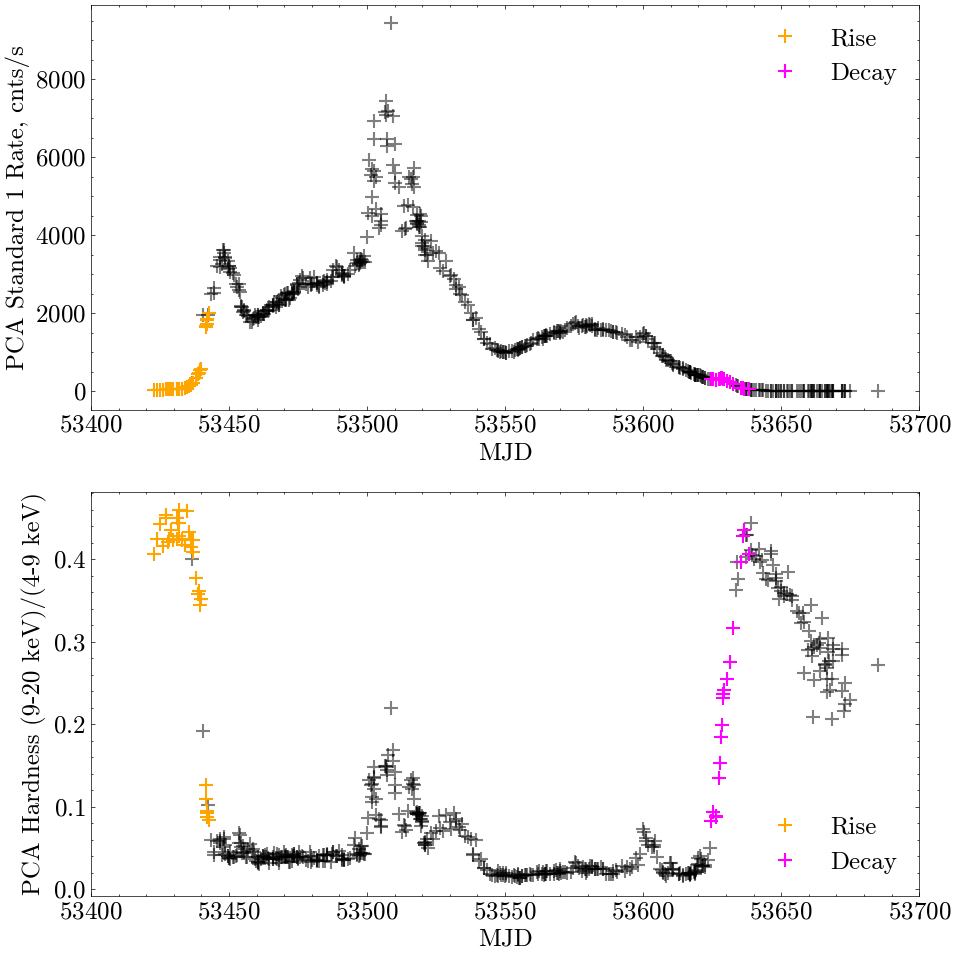

In [11]:
# Ensure 'OBSID' column is treated as strings, strip whitespace, and convert to lowercase
data_df['OBSID'] = data_df['OBSID'].astype(str).str.strip().str.lower()

# Define 'rise' OBSID list (observations during the rising phase of the outburst)
rise_obsid = [obsid.lower() for obsid in [
    "90058-16-02-00", "90058-16-03-00", "90058-16-04-00", "90058-16-05-00", "90058-16-06-00", "90058-16-07-00",
    "90428-01-01-00", "90428-01-01-01", "90428-01-01-02", "90428-01-01-03", "90428-01-01-04", "90428-01-01-05", 
    "90428-01-01-06", "90428-01-01-07", "90428-01-01-08", "90428-01-01-09", "90428-01-01-10", "91404-01-01-00", 
    "91404-01-01-02", "91404-01-01-03", "91404-01-01-01", "91404-01-01-04", "91404-01-01-05", "91702-01-01-01",
    "91702-01-01-02", "91702-01-01-03", "91702-01-01-04", "91702-01-01-05", "90704-04-01-00", "90704-04-01-01",
    "91702-01-02-01", "91702-01-02-02", "91702-01-02-03", "91702-01-02-04", "91702-01-02-05", "91702-01-02-06",
]]

# Define 'decay' OBSID list (observations during the decaying phase of the outburst)
decay_obsid = [obsid.lower() for obsid in [
    "91702-01-71-02", "91702-01-71-03", "91702-01-71-04", "91702-01-74-02", "91702-01-75-00", "91702-01-75-03", 
    "91702-01-76-00", "91702-01-76-01", "91702-01-76-02", "91702-01-76-03", "91702-01-79-00", "91702-01-79-01", 
    "91702-01-80-00", "91702-01-80-01", "91702-01-81-02", "91702-01-82-00", "91702-01-86-00", "91702-01-87-03"
]]

# Create boolean masks to filter data by phase (rise vs decay)
mask_rise = data_df['OBSID'].isin(rise_obsid)
mask_decay = data_df['OBSID'].isin(decay_obsid)

# Separate data into rise, decay, and other categories
data_rise = data_df[mask_rise]
data_decay = data_df[mask_decay]
data_other = data_df[~(mask_rise | mask_decay)]

# Debug: Print counts of entries in each category to verify correctness
print("Number of entries in data_rise:", len(data_rise))
print("Number of entries in data_decay:", len(data_decay))
print("Number of entries in data_other:", len(data_other))

# Create a figure with 2 vertically stacked subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# First plot: Light Curve
ax1.plot(data_other.x, data_other.y_1, linestyle='none', marker='+', color='black', markersize=10, alpha=0.5, markeredgewidth=1.5)
ax1.plot(data_rise.x, data_rise.y_1, linestyle='none', marker='+', color='orange', markersize=10, markeredgewidth=1.5, label='Rise')
ax1.plot(data_decay.x, data_decay.y_1, linestyle='none', marker='+', color='magenta', markersize=10, markeredgewidth=1.5, label='Decay')
ax1.set_xlim([53400, 53700])  # Restrict x-axis range to the outburst interval
ax1.set_xlabel('MJD')
ax1.set_ylabel('PCA Standard 1 Rate, cnts/s')
ax1.legend()

# Second plot: Hardness Ratio
ax2.plot(data_other.x, data_other.y_2, linestyle='none', marker='+', color='black', markersize=10, alpha=0.5, markeredgewidth=1.5)
ax2.plot(data_rise.x, data_rise.y_2, linestyle='none', marker='+', color='orange', markersize=10, markeredgewidth=1.5, label='Rise')
ax2.plot(data_decay.x, data_decay.y_2, linestyle='none', marker='+', color='magenta', markersize=10, markeredgewidth=1.5, label='Decay')
ax2.set_xlim([53400, 53700])  # Same time window for consistency
ax2.set_xlabel('MJD')
ax2.set_ylabel('PCA Hardness (9-20 keV)/(4-9 keV)')
ax2.legend()

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('LC and HR GRO J1655.png', dpi=300)
plt.show()


In [12]:
# Flexible function to plot data with optional error bars
def plot_dataset(df, y_col, err_col_p=None, err_col_m=None, color='blue', marker='o', label='', ax=None):
    # Ensure required columns exist
    if not all(col in df.columns for col in ['mjd', y_col]):
        print(f"Dataset {label} is missing 'mjd' or '{y_col}'. Available columns: {df.columns}")
        return

    # Convert necessary columns to numeric values
    df['mjd'] = pd.to_numeric(df['mjd'], errors='coerce')
    df[y_col] = pd.to_numeric(df[y_col], errors='coerce')
    if err_col_p and err_col_p in df.columns:
        df[err_col_p] = pd.to_numeric(df[err_col_p], errors='coerce')
    if err_col_m and err_col_m in df.columns:
        df[err_col_m] = pd.to_numeric(df[err_col_m], errors='coerce')

    # Extract data for plotting
    mjd = df['mjd']
    y_data = df[y_col]

    # Construct error bars if both positive and negative errors are provided
    yerr = None
    if err_col_p and err_col_m and err_col_p in df.columns and err_col_m in df.columns:
        yerr = [np.abs(df[err_col_m]), df[err_col_p]]

    # Plot data points with optional error bars
    ax.errorbar(
        mjd, y_data, 
        yerr=yerr, 
        fmt=marker, color=color, capsize=3, 
        label=label
    )

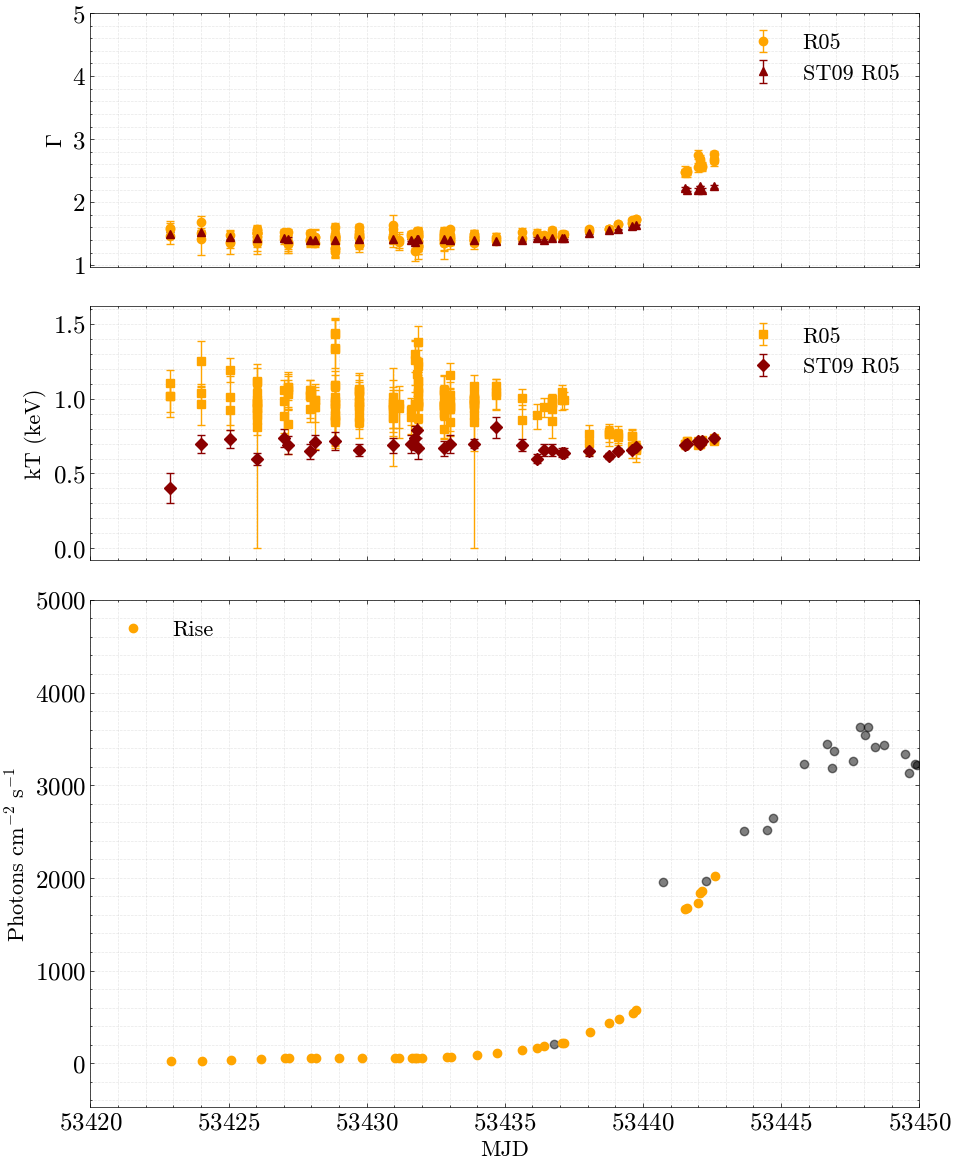

In [13]:
# Create figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True, gridspec_kw={'height_ratios': [1, 1, 2]})

# Panel 1: Photon index Gamma
df_R05['gamma'] = df_R05['alpha'] + 1
df_ST09_R05['gamma'] = df_ST09_R05['alpha'] + 1

plot_dataset(
    df_R05, y_col='gamma', err_col_p='err_alpha_p', err_col_m='err_alpha_m',
    color='orange', marker='o', label='R05', ax=ax1
)
plot_dataset(
    df_ST09_R05, y_col='gamma', err_col_p='err_alpha_p', err_col_m='err_alpha_m',
    color='darkred', marker='^', label='ST09 R05', ax=ax1
)

ax1.set_ylabel(r'$\Gamma$', fontsize=16)
ax1.grid(True, which="both", ls="--", alpha=0.3)
ax1.legend(loc='upper right', fontsize=16)

# Panel 2: Disk temperature kT
plot_dataset(
    df_R05, y_col='kT', err_col_p='err_kT_p', err_col_m='err_kT_m',
    color='orange', marker='s', label='R05', ax=ax2
)
plot_dataset(
    df_ST09_R05, y_col='kT', err_col_p='err_kT_p', err_col_m='err_kT_m',
    color='darkred', marker='D', label='ST09 R05', ax=ax2
)

ax2.set_ylabel('kT (keV)', fontsize=16)
ax2.grid(True, which="both", ls="--", alpha=0.3)
ax2.legend(loc='upper right', fontsize=16)

# Panel 3: Light curve (PCA counts)
ax3.plot(data_other.x, data_other.y_1, linestyle='none', marker='.', color='black', markersize=12, alpha=0.5)
ax3.plot(data_rise.x, data_rise.y_1, linestyle='none', marker='.', color='orange', markersize=12, label='Rise')
ax3.plot(data_decay.x, data_decay.y_1, linestyle='none', marker='.', color='magenta', markersize=12)

ax3.set_xlabel('MJD', fontsize=16)
ax3.set_ylabel('Photons cm$^{-2}$ s$^{-1}$', fontsize=16)
ax3.grid(True, which="both", ls="--", alpha=0.3)
ax3.legend(loc='upper left', fontsize=16)

# Axis limits
for ax in [ax1, ax2, ax3]:
    ax.set_xlim([53420, 53450])  # adjust to your data range

ax1.set_ylim(top=5)
ax3.set_ylim(top=5000)

# Save and show the final plot
plt.tight_layout()
plt.savefig('parameter dan kurva cahaya R05.png', dpi=300)
plt.show()


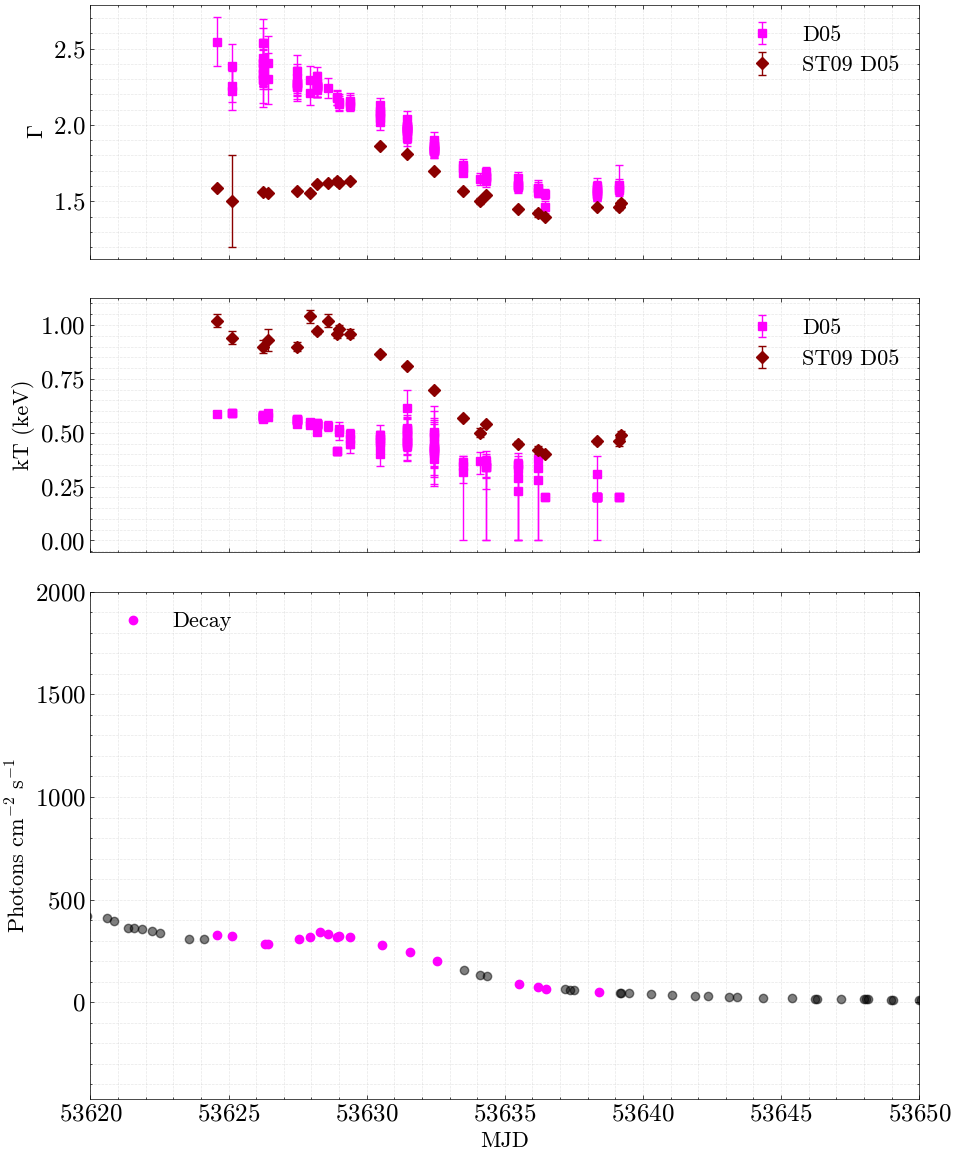

In [14]:
# Create figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True, gridspec_kw={'height_ratios': [1, 1, 2]})

# Panel 1: Photon index Gamma
df_D05['gamma'] = df_D05['alpha'] + 1
df_ST09_D05['gamma'] = df_ST09_D05['alpha'] + 1
plot_dataset(df_D05, y_col='gamma', err_col_p='err_alpha_p', err_col_m='err_alpha_m', color='magenta', marker='s', label='D05', ax=ax1)
plot_dataset(df_ST09_D05, y_col='gamma', err_col_p='err_alpha_p', err_col_m='err_alpha_m', color='darkred', marker='D', label='ST09 D05', ax=ax1)

ax1.set_ylabel(r'$\Gamma$', fontsize=16)
ax1.grid(True, which="both", ls="--", alpha=0.3)
ax1.legend(loc='upper right', fontsize=16)

# Panel 2: Disk temperature kT
plot_dataset(df_D05, y_col='kT', err_col_p='err_kT_p', err_col_m='err_kT_m', color='magenta', marker='s', label='D05', ax=ax2)
plot_dataset(df_ST09_D05, y_col='kT', err_col_p='err_kT_p', err_col_m='err_kT_m', color='darkred', marker='D', label='ST09 D05', ax=ax2)

ax2.set_ylabel('kT (keV)', fontsize=16)
ax2.grid(True, which="both", ls="--", alpha=0.3)
ax2.legend(loc='upper right', fontsize=16)

# Panel 3: Light curve (PCA counts)
ax3.plot(data_other.x, data_other.y_1, linestyle='none', marker='.', color='black', markersize=12, alpha=0.5)
ax3.plot(data_rise.x, data_rise.y_1, linestyle='none', marker='.', color='orange', markersize=12)
ax3.plot(data_decay.x, data_decay.y_1, linestyle='none', marker='.', color='magenta', markersize=12, label='Decay')

ax3.set_xlabel('MJD', fontsize=16)
ax3.set_ylabel('Photons cm$^{-2}$ s$^{-1}$', fontsize=16)
ax3.grid(True, which="both", ls="--", alpha=0.3)
ax3.legend(loc='upper left', fontsize=16)


# Axis limits
for ax in [ax1, ax2, ax3]:
    ax.set_xlim([53620, 53650])  # Ganti dengan rentang data kamu jika berbeda

ax3.set_ylim(top=2000)

# Save and show the final plot
plt.tight_layout()
plt.savefig('parameter dan kurva cahaya D05.png', dpi=300)
plt.show()


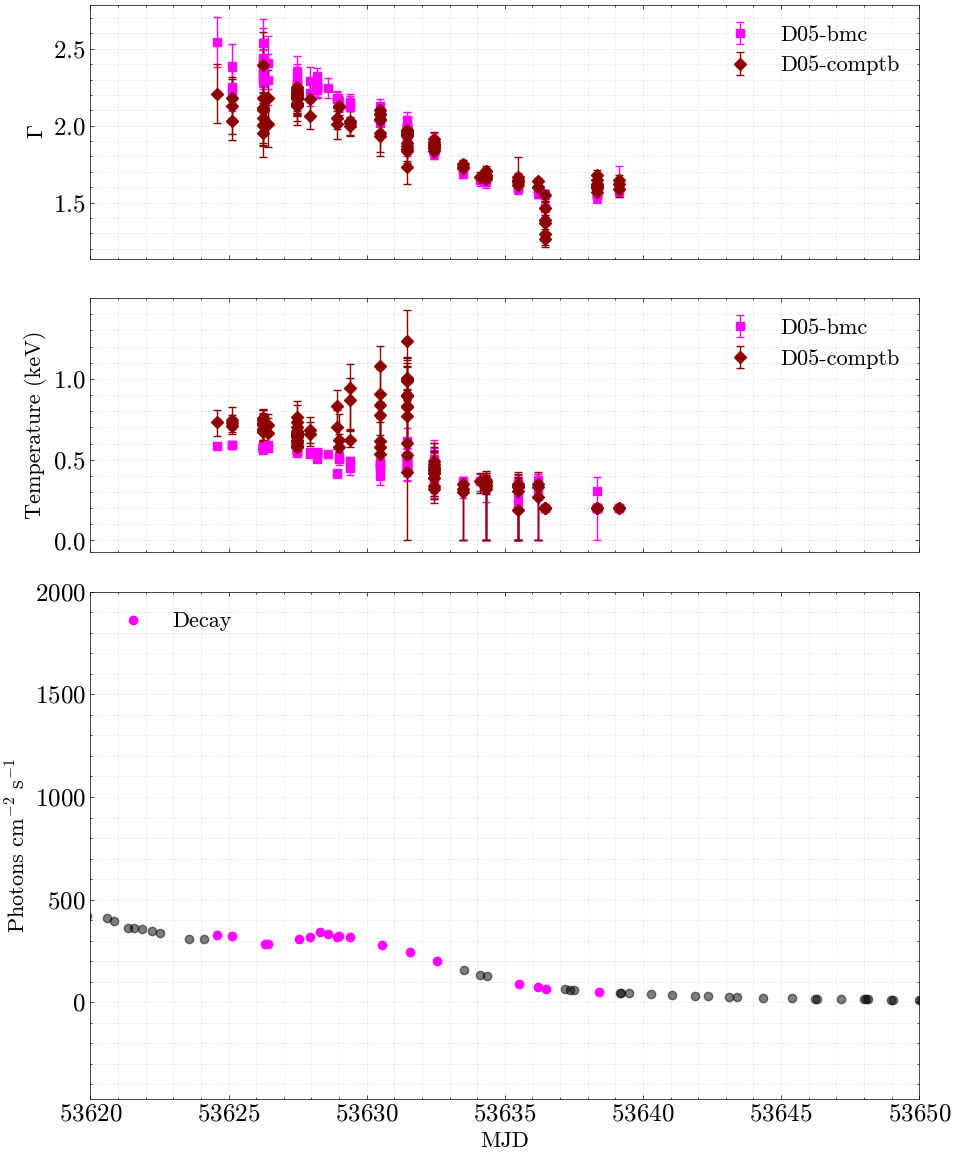

In [15]:
# Create figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True, gridspec_kw={'height_ratios': [1, 1, 2]})

# Panel 1: Photon index Gamma
df_D05['gamma'] = df_D05['alpha'] + 1
df_D05c['gamma'] = df_D05c['alpha'] + 1
plot_dataset(df_D05, y_col='gamma', err_col_p='err_alpha_p', err_col_m='err_alpha_m', color='magenta', marker='s', label='D05-bmc', ax=ax1)
plot_dataset(df_D05c, y_col='gamma', err_col_p='err_alpha_p', err_col_m='err_alpha_m', color='darkred', marker='D', label='D05-comptb', ax=ax1)

ax1.set_ylabel(r'$\Gamma$', fontsize=16)
ax1.grid(True, which="both", ls="--", alpha=0.3)
ax1.legend(loc='upper right', fontsize=16)

# Panel 2: Disk temperature kT
plot_dataset(df_D05, y_col='kT', err_col_p='err_kT_p', err_col_m='err_kT_m', color='magenta', marker='s', label='D05-bmc', ax=ax2)
plot_dataset(df_D05c, y_col='kT', err_col_p='err_kT_p', err_col_m='err_kT_m', color='darkred', marker='D', label='D05-comptb', ax=ax2)

ax2.set_ylabel('Temperature (keV)', fontsize=16)
ax2.grid(True, which="both", ls="--", alpha=0.3)
ax2.legend(loc='upper right', fontsize=16)


# Panel 3: Light curve (PCA counts)
ax3.plot(data_other.x, data_other.y_1, linestyle='none', marker='.', color='black', markersize=12, alpha=0.5)
ax3.plot(data_rise.x, data_rise.y_1, linestyle='none', marker='.', color='orange', markersize=12)
ax3.plot(data_decay.x, data_decay.y_1, linestyle='none', marker='.', color='magenta', markersize=12, label='Decay')

ax3.set_xlabel('MJD', fontsize=16)
ax3.set_ylabel('Photons cm$^{-2}$ s$^{-1}$', fontsize=16)
ax3.grid(True, which="both", ls="--", alpha=0.3)
ax3.legend(loc='upper left', fontsize=16)


# Axis limits
for ax in [ax1, ax2, ax3]:
    ax.set_xlim([53620, 53650])  # Ganti dengan rentang data kamu jika berbeda

ax3.set_ylim(top=2000)

# Save and show the final plot
plt.tight_layout()
plt.savefig('parameter dan kurva cahaya D05-comptb.png', dpi=300)
plt.show()


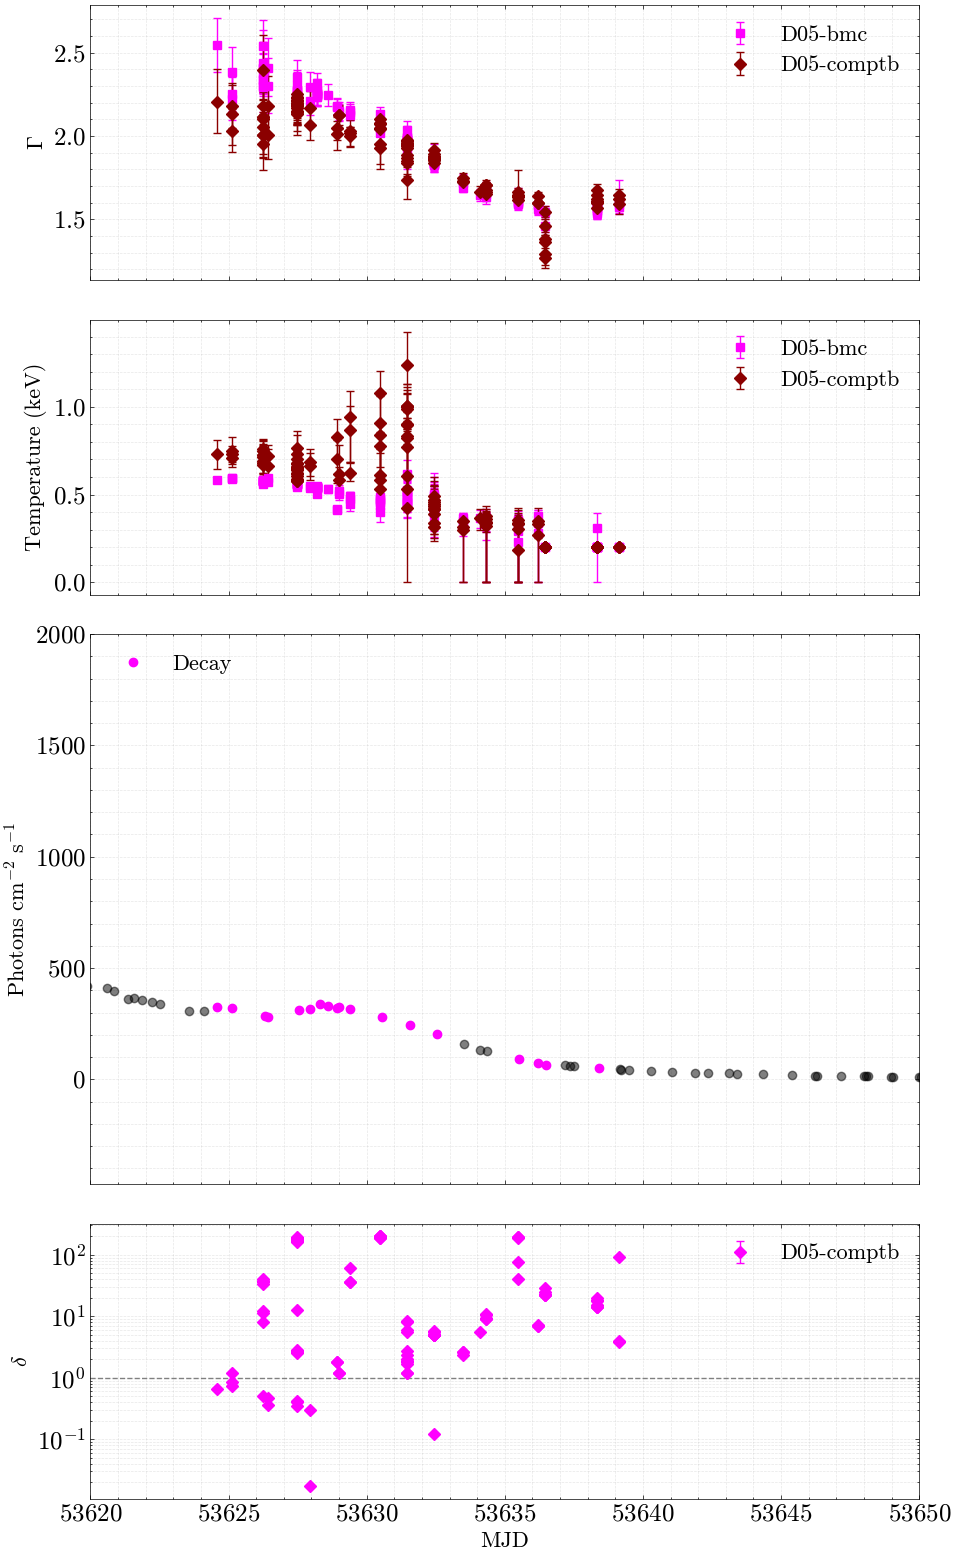

In [16]:
# Create figure with 3 subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 16), sharex=True, gridspec_kw={'height_ratios': [1, 1, 2, 1]})

# Panel 1: Photon index Gamma
df_D05['gamma'] = df_D05['alpha'] + 1
df_D05c['gamma'] = df_D05c['alpha'] + 1
plot_dataset(df_D05, y_col='gamma', err_col_p='err_alpha_p', err_col_m='err_alpha_m', color='magenta', marker='s', label='D05-bmc', ax=ax1)
plot_dataset(df_D05c, y_col='gamma', err_col_p='err_alpha_p', err_col_m='err_alpha_m', color='darkred', marker='D', label='D05-comptb', ax=ax1)

ax1.set_ylabel(r'$\Gamma$', fontsize=16)
ax1.grid(True, which="both", ls="--", alpha=0.3)
ax1.legend(loc='upper right', fontsize=16)

# Panel 2: Disk temperature kT
plot_dataset(df_D05, y_col='kT', err_col_p='err_kT_p', err_col_m='err_kT_m', color='magenta', marker='s', label='D05-bmc', ax=ax2)
plot_dataset(df_D05c, y_col='kT', err_col_p='err_kT_p', err_col_m='err_kT_m', color='darkred', marker='D', label='D05-comptb', ax=ax2)

ax2.set_ylabel('Temperature (keV)', fontsize=16)
ax2.grid(True, which="both", ls="--", alpha=0.3)
ax2.legend(loc='upper right', fontsize=16)

# Panel 3: Light curve (PCA counts)
ax3.plot(data_other.x, data_other.y_1, linestyle='none', marker='.', color='black', markersize=12, alpha=0.5)
ax3.plot(data_rise.x, data_rise.y_1, linestyle='none', marker='.', color='orange', markersize=12)
ax3.plot(data_decay.x, data_decay.y_1, linestyle='none', marker='.', color='magenta', markersize=12, label='Decay')

ax3.set_ylabel('Photons cm$^{-2}$ s$^{-1}$', fontsize=16)
ax3.grid(True, which="both", ls="--", alpha=0.3)
ax3.legend(loc='upper left', fontsize=16)

# Panel 3: delta
plot_dataset(df_D05c, y_col='delta', err_col_p='err_delta_p', err_col_m='err_delta_m', color='magenta', marker='D', label='D05-comptb', ax=ax4)

ax4.set_yscale('log')
ax4.set_ylabel(r'$\delta$', fontsize=16)
ax4.set_xlabel('MJD', fontsize=16)
ax4.axhline(y=1, color='gray', linestyle='--', linewidth=1)
ax4.grid(True, which="both", ls="--", alpha=0.3)
ax4.legend(loc='upper right', fontsize=16)

# Axis limits
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlim([53620, 53650])

ax3.set_ylim(top=2000)

# Save and show the final plot
plt.tight_layout()
plt.savefig('parameter dan kurva cahaya D05-comptb-delta.png', dpi=300)
plt.show()


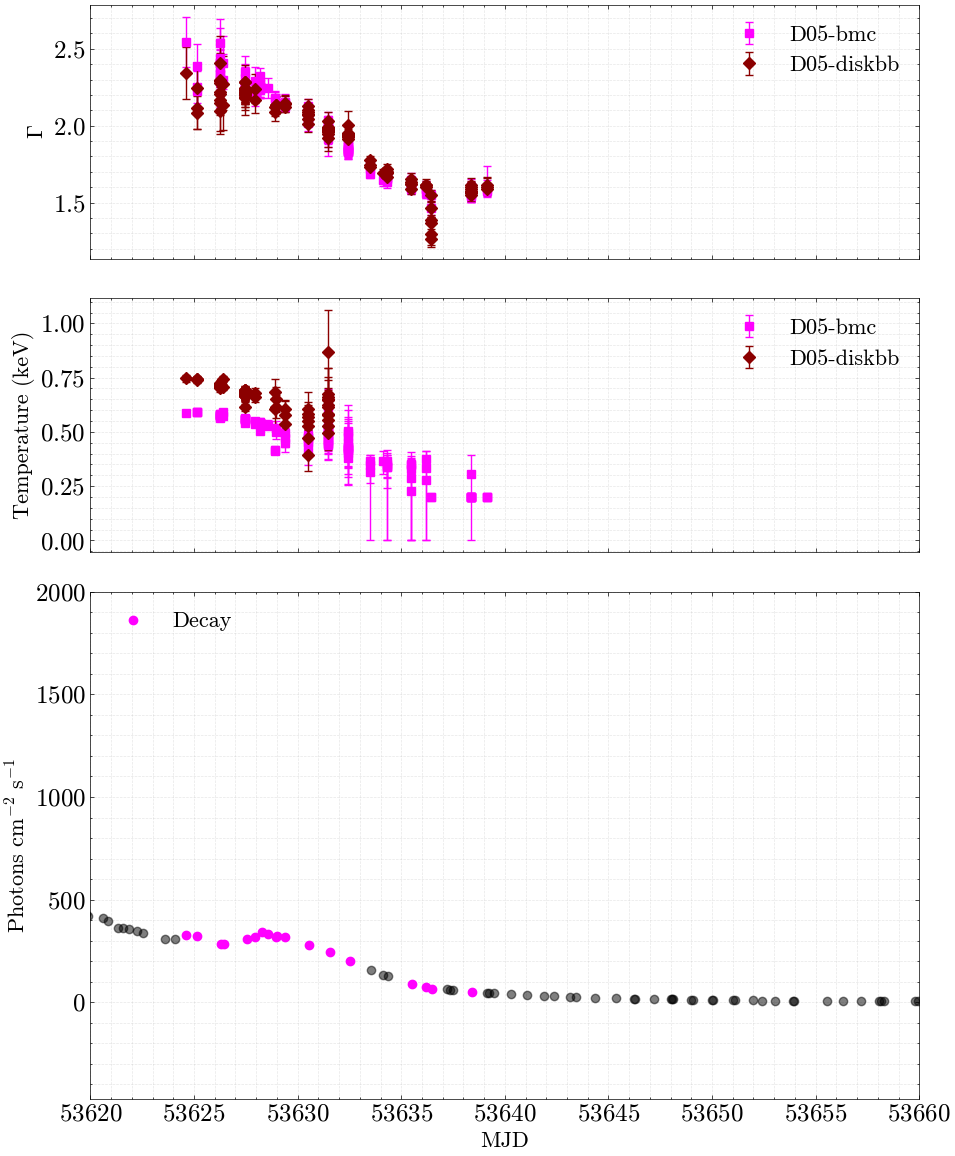

In [17]:
# Create figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True, gridspec_kw={'height_ratios': [1, 1, 2]})

# Panel 1: Photon index Gamma
df_D05['gamma'] = df_D05['alpha'] + 1
plot_dataset(df_D05, y_col='gamma', err_col_p='err_alpha_p', err_col_m='err_alpha_m', color='magenta', marker='s', label='D05-bmc', ax=ax1)
plot_dataset(df_D05d, y_col='pho_index', err_col_p='err_pho_index_p', err_col_m='err_pho_index_m', color='darkred', marker='D', label='D05-diskbb', ax=ax1)

ax1.set_ylabel(r'$\Gamma$', fontsize=16)
ax1.grid(True, which="both", ls="--", alpha=0.3)
ax1.legend(loc='upper right', fontsize=16)

# Panel 2: Disk temperature kT
plot_dataset(df_D05, y_col='kT', err_col_p='err_kT_p', err_col_m='err_kT_m', color='magenta', marker='s', label='D05-bmc', ax=ax2)
plot_dataset(df_D05d, y_col='T_in', err_col_p='err_T_in_p', err_col_m='err_T_in_m', color='darkred', marker='D', label='D05-diskbb', ax=ax2)

ax2.set_ylabel('Temperature (keV)', fontsize=16)
ax2.grid(True, which="both", ls="--", alpha=0.3)
ax2.legend(loc='upper right', fontsize=16)

# Panel 3: Light curve (PCA counts)
ax3.plot(data_other.x, data_other.y_1, linestyle='none', marker='.', color='black', markersize=12, alpha=0.5)
ax3.plot(data_rise.x, data_rise.y_1, linestyle='none', marker='.', color='orange', markersize=12)
ax3.plot(data_decay.x, data_decay.y_1, linestyle='none', marker='.', color='magenta', markersize=12, label='Decay')

ax3.set_xlabel('MJD', fontsize=16)
ax3.set_ylabel('Photons cm$^{-2}$ s$^{-1}$', fontsize=16)
ax3.grid(True, which="both", ls="--", alpha=0.3)
ax3.legend(loc='upper left', fontsize=16)


# Axis limits
for ax in [ax1, ax2, ax3]:
    ax.set_xlim([53620, 53660])  # Ganti dengan rentang data kamu jika berbeda

ax3.set_ylim(top=2000)

# Save and show the final plot
plt.tight_layout()
plt.savefig('parameter dan kurva cahaya D05-diskbb.png', dpi=300)
plt.show()


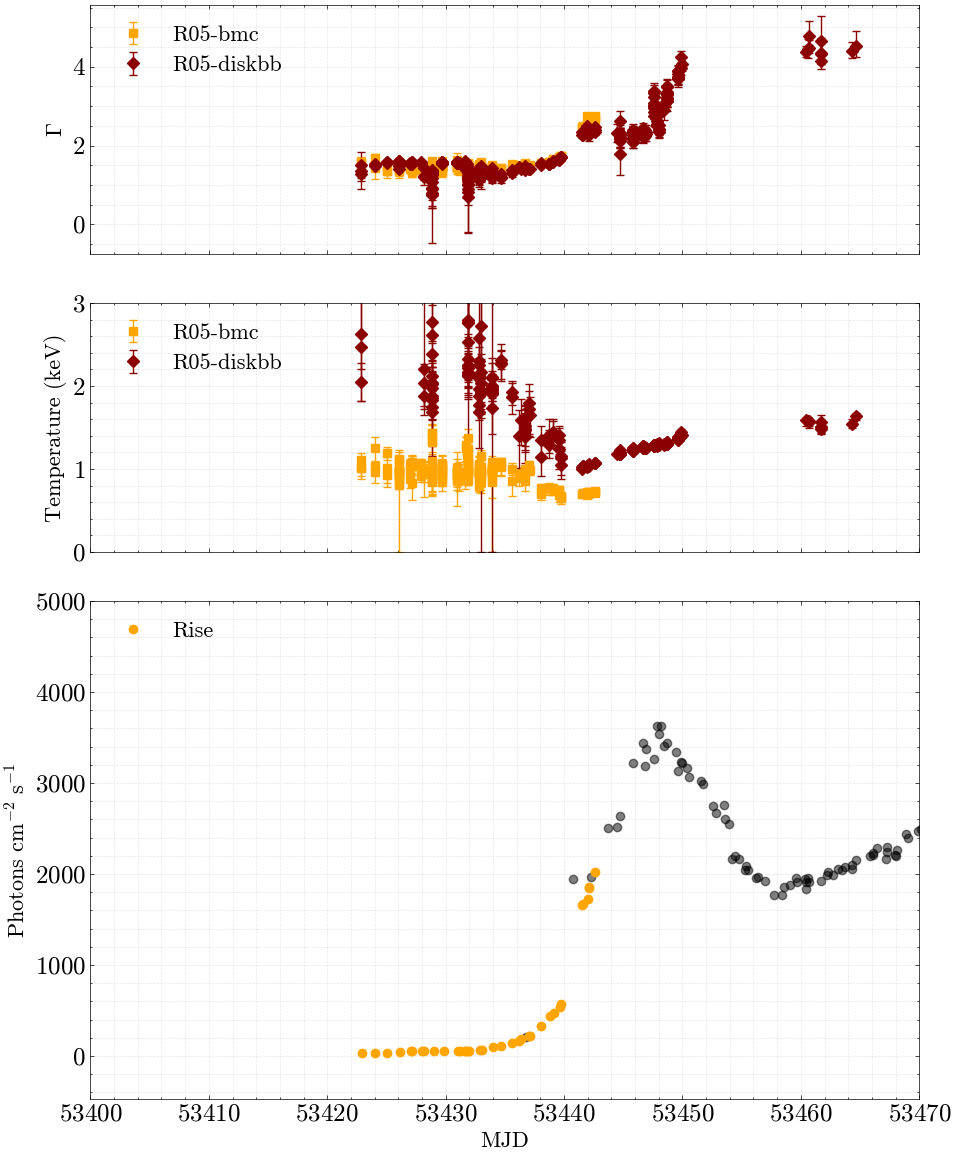

In [18]:
# Create figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True, gridspec_kw={'height_ratios': [1, 1, 2]})

# Panel 1: Photon index Gamma
df_R05['gamma'] = df_R05['alpha'] + 1
plot_dataset(df_R05, y_col='gamma', err_col_p='err_alpha_p', err_col_m='err_alpha_m', color='orange', marker='s', label='R05-bmc', ax=ax1)
plot_dataset(df_R05d, y_col='pho_index', err_col_p='err_pho_index_p', err_col_m='err_pho_index_m', color='darkred', marker='D', label='R05-diskbb', ax=ax1)

ax1.set_ylabel(r'$\Gamma$', fontsize=16)
ax1.grid(True, which="both", ls="--", alpha=0.3)
ax1.legend(loc='upper left', fontsize=16)

# Panel 2: Disk temperature kT
df_R05 = df_R05[df_R05['kT'] > 0]
df_R05d = df_R05d[df_R05d['T_in'] > 0]
plot_dataset(df_R05, y_col='kT', err_col_p='err_kT_p', err_col_m='err_kT_m', color='orange', marker='s', label='R05-bmc', ax=ax2)
plot_dataset(df_R05d, y_col='T_in', err_col_p='err_T_in_p', err_col_m='err_T_in_m', color='darkred', marker='D', label='R05-diskbb', ax=ax2)

ax2.set_ylabel('Temperature (keV)', fontsize=16)
ax2.grid(True, which="both", ls="--", alpha=0.3)
ax2.legend(loc='upper left', fontsize=16)

# Panel 3: Light curve (PCA counts)
ax3.plot(data_other.x, data_other.y_1, linestyle='none', marker='.', color='black', markersize=12, alpha=0.5)
ax3.plot(data_rise.x, data_rise.y_1, linestyle='none', marker='.', color='orange', markersize=12, label='Rise')
ax3.plot(data_decay.x, data_decay.y_1, linestyle='none', marker='.', color='magenta', markersize=12)

ax3.set_xlabel('MJD', fontsize=16)
ax3.set_ylabel('Photons cm$^{-2}$ s$^{-1}$', fontsize=16)
ax3.grid(True, which="both", ls="--", alpha=0.3)
ax3.legend(loc='upper left', fontsize=16)


# Axis limits
for ax in [ax1, ax2, ax3]:
    ax.set_xlim([53400, 53470])  # Ganti dengan rentang data kamu jika berbeda

ax2.set_ylim(top=3, bottom=0)
ax3.set_ylim(top=5000)

# Save and show the final plot
plt.tight_layout()
plt.savefig('parameter dan kurva cahaya R05-diskbb.png', dpi=300)
plt.show()


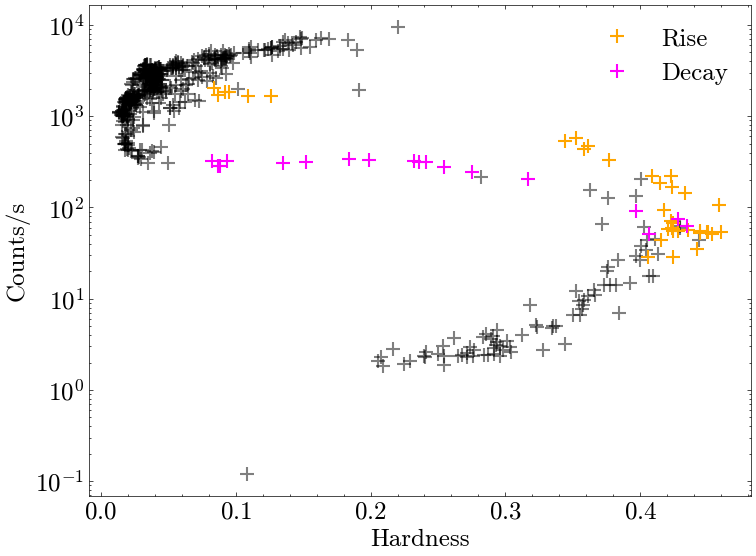

In [19]:
plt.figure(figsize=(8, 6))
# Plot other data (black color)
plt.plot(data_other['y_2'], data_other['y_1'], linestyle='none', marker='+', color='black', markersize=10, markeredgewidth=1.5, alpha=0.5)

# Plot rise data (orange color)
plt.plot(data_rise['y_2'], data_rise['y_1'], linestyle='none', marker='+', color='orange', markersize=10, markeredgewidth=1.5, label='Rise')

# Plot decay data (magenta color)
plt.plot(data_decay['y_2'], data_decay['y_1'], linestyle='none', marker='+', color='magenta', markersize=10, markeredgewidth=1.5, label='Decay')

# Add labels, legend, and scale
plt.yscale('log')
plt.xlabel('Hardness')
plt.ylabel('Counts/s')
plt.legend()
plt.tight_layout()
plt.savefig('HID Rise Decay GROJ1655.png', dpi=300)
plt.show()